Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels

In [2]:
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')

In [3]:
%matplotlib inline
df = pd.read_csv('C:/Users/pragupta/Desktop/Submission/Project_6/data_stocks.csv')

In [4]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df.isnull().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [6]:
df.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [7]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [8]:
# pd.to_datetime(df["DATE"][3]).strftime('%Y/%M/%D , %H:%m:%S')

In [9]:
# timestamp = datetime.datetime.fromtimestamp(1491226320)
# timestamp


In [10]:
# print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

In [8]:
df["DATE"]=pd.to_datetime(df['DATE'],unit='s')

In [12]:
df["DATE"].unique()

array(['2017-04-03T13:30:00.000000000', '2017-04-03T13:31:00.000000000',
       '2017-04-03T13:32:00.000000000', ...,
       '2017-08-31T19:58:00.000000000', '2017-08-31T19:59:00.000000000',
       '2017-08-31T20:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
df.isnull().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [14]:
df.shape

(41266, 502)

In [15]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [9]:
df =df.set_index("DATE")

In [10]:
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [18]:
df.isnull().sum()

SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
NASDAQ.ADI     0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 501, dtype: int64

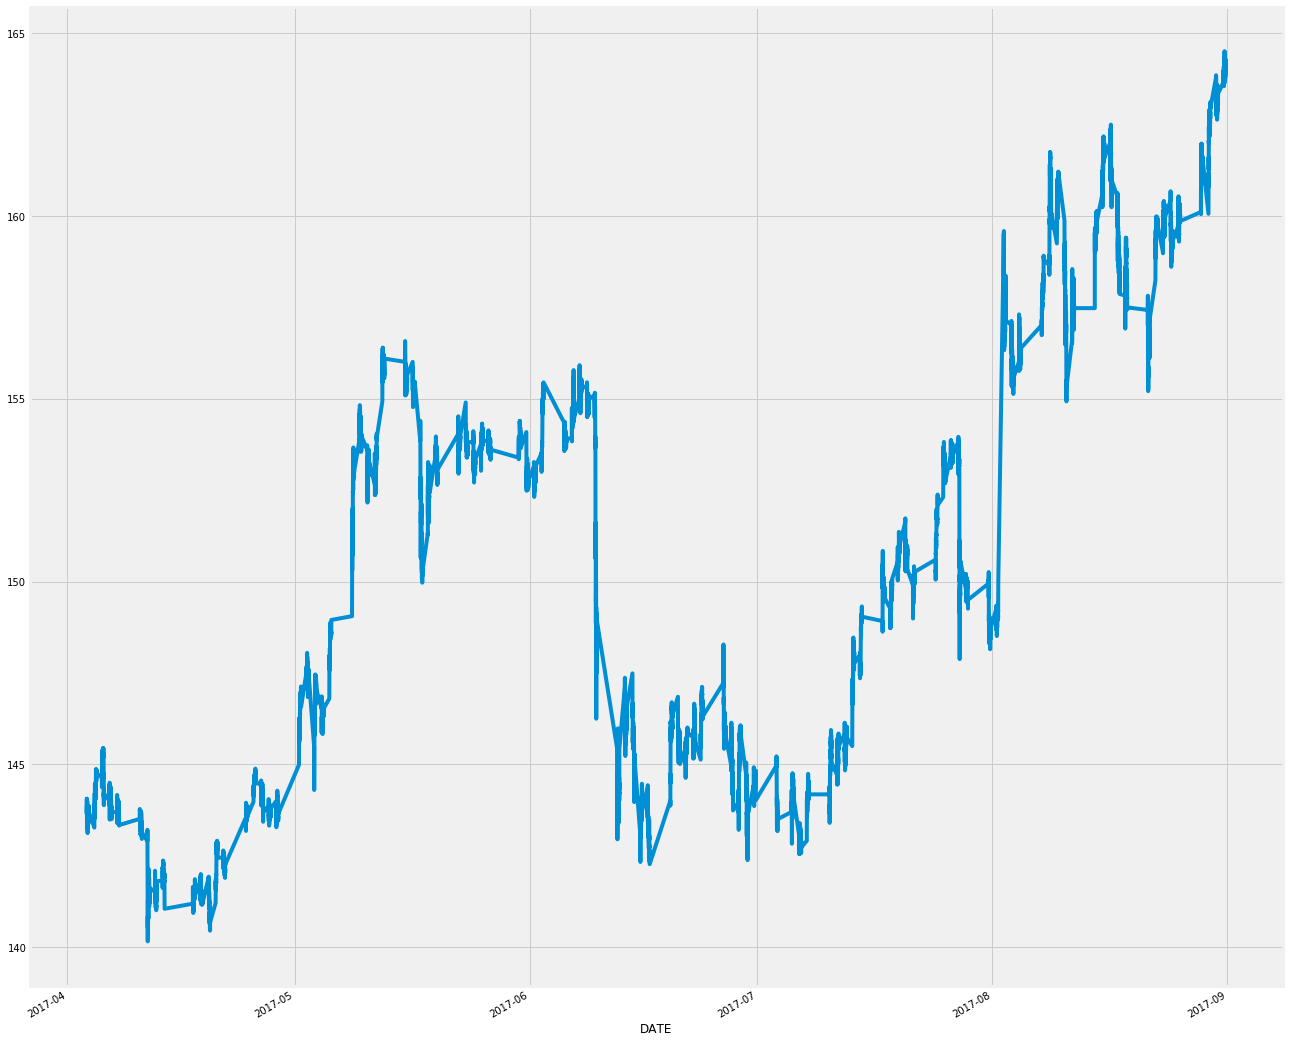

In [11]:
df["NASDAQ.AAPL"].plot(figsize =(20,20))

In [12]:
# 1. NASDAQ.AAPL
# 2. NASDAQ.ADP
# 3. NASDAQ.CBOE
# 4. NASDAQ.CSCO
# 5. NASDAQ.EBAY

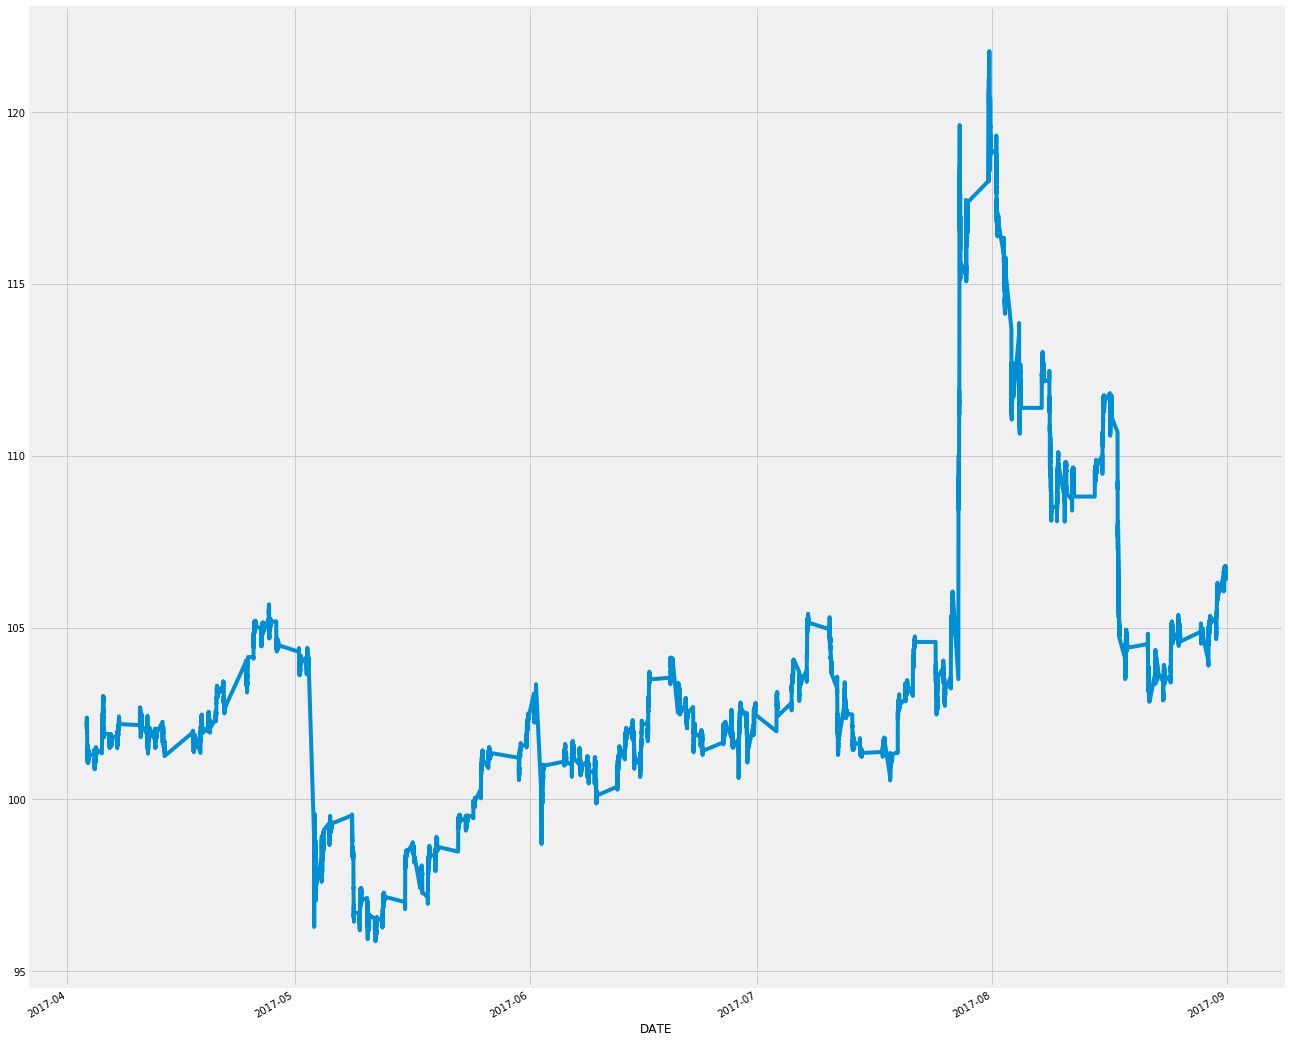

In [13]:
df["NASDAQ.ADP"].plot(figsize =(20,20)) 

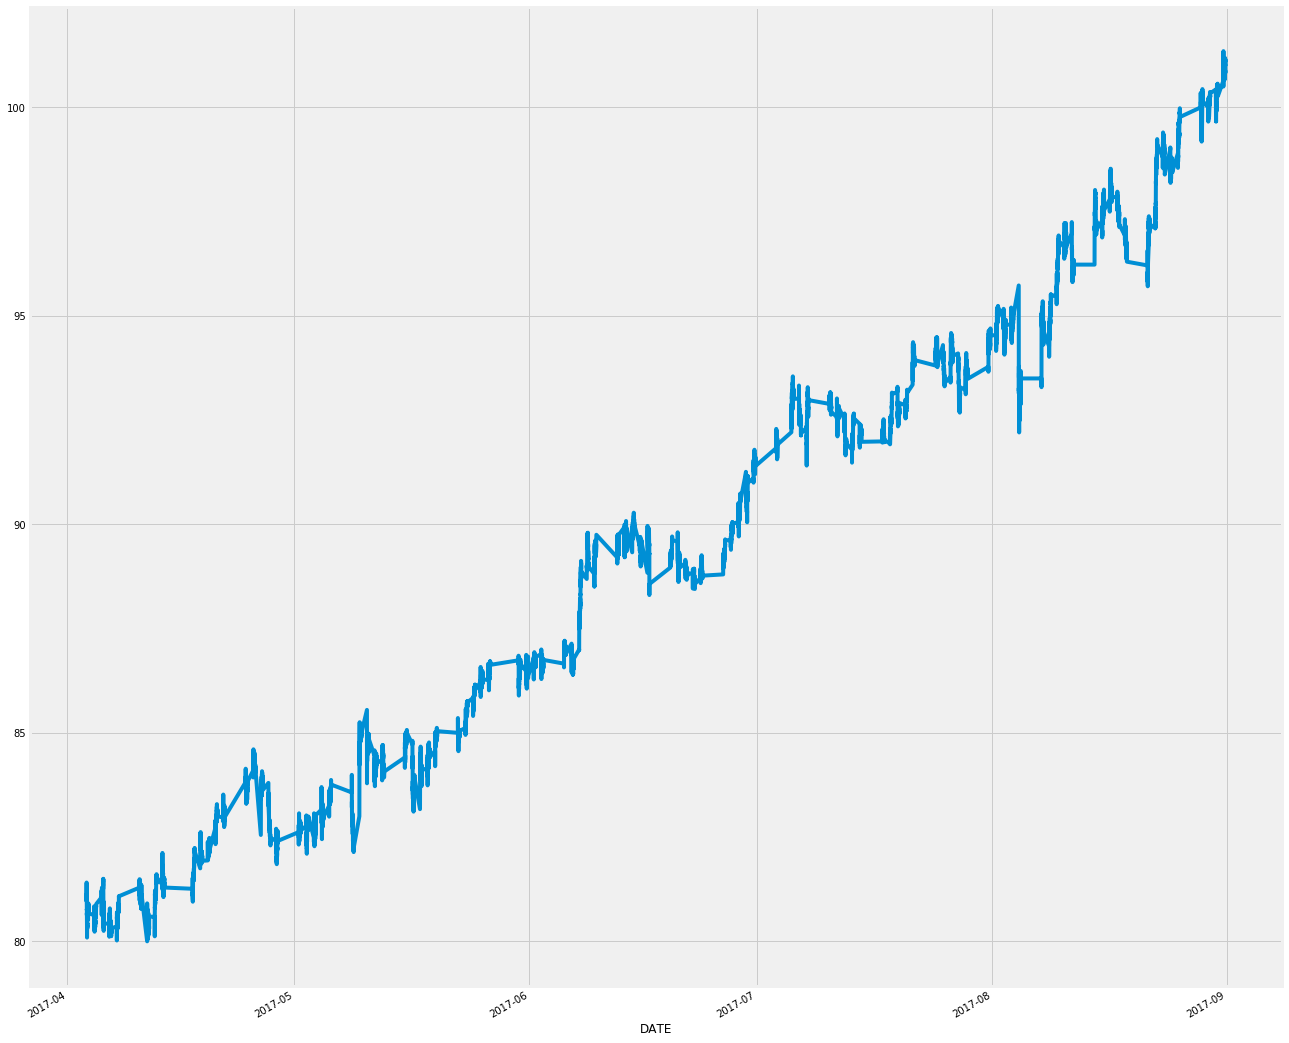

In [14]:
df["NASDAQ.CBOE"].plot(figsize =(20,20))

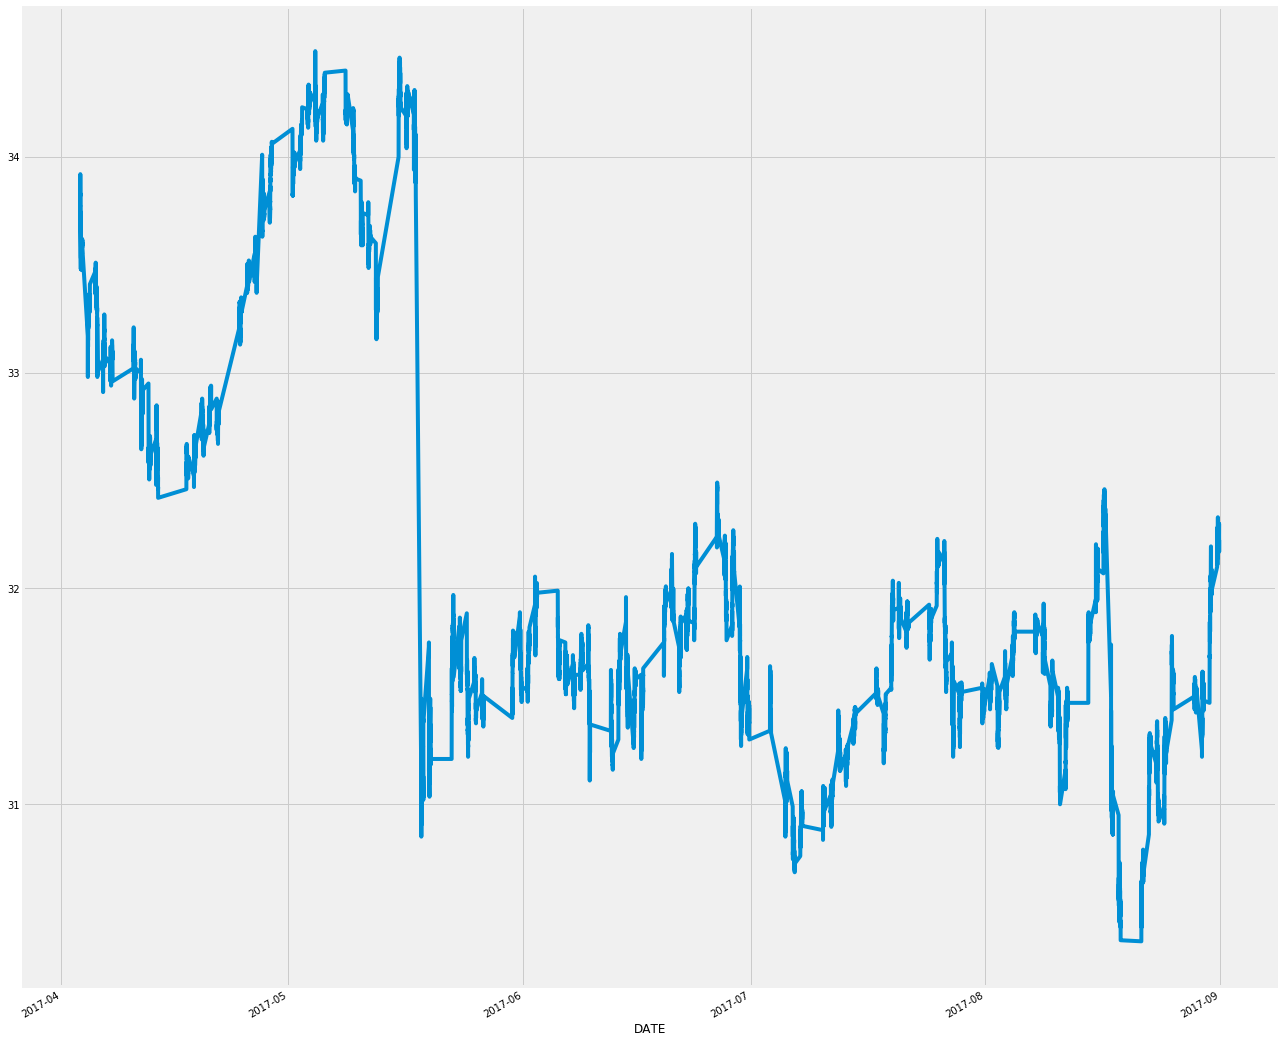

In [15]:
df["NASDAQ.CSCO"].plot(figsize =(20,20))

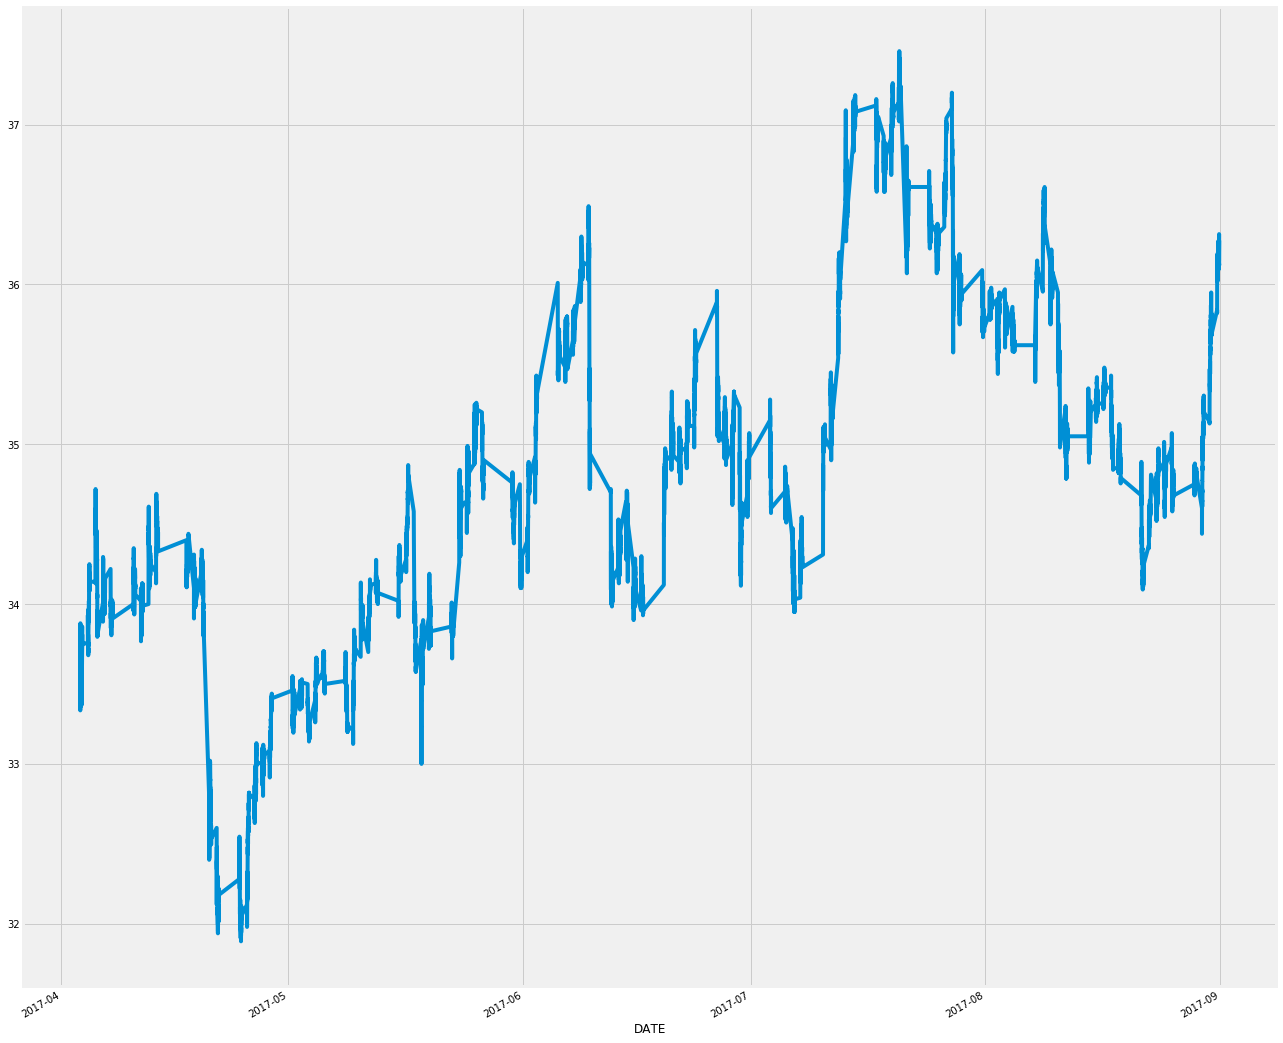

In [24]:
 df["NASDAQ.EBAY"].plot(figsize =(20,20))

In [25]:
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [16]:
AAPL =np.log(df["NASDAQ.AAPL"])

In [17]:
AAPL

DATE
2017-04-03 13:30:00    4.967589
2017-04-03 13:31:00    4.967728
2017-04-03 13:32:00    4.967659
2017-04-03 13:33:00    4.967310
2017-04-03 13:34:00    4.967449
                         ...   
2017-08-31 19:56:00    5.100537
2017-08-31 19:57:00    5.100598
2017-08-31 19:58:00    5.099927
2017-08-31 19:59:00    5.099134
2017-08-31 20:00:00    5.099744
Name: NASDAQ.AAPL, Length: 41266, dtype: float64

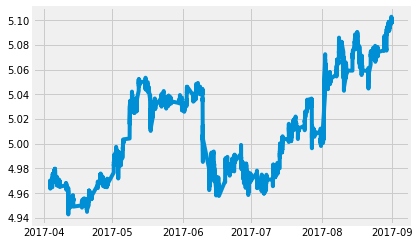

In [18]:
plt.plot(AAPL)

In [22]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf



In [30]:
acf_1 =acf(AAPL)
acf_1

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([1.        , 0.99981927, 0.99964147, 0.99946659, 0.99928951,
       0.99911596, 0.99894351, 0.99877131, 0.99859635, 0.99842166,
       0.99824462, 0.99806842, 0.99789777, 0.9977262 , 0.9975523 ,
       0.9973798 , 0.99720977, 0.9970374 , 0.9968639 , 0.99668953,
       0.9965163 , 0.99633824, 0.99616084, 0.99598268, 0.99580685,
       0.9956298 , 0.99545261, 0.99527681, 0.99510244, 0.99492609,
       0.99475206, 0.99457532, 0.99439648, 0.99421868, 0.99404053,
       0.99386264, 0.99368489, 0.99350574, 0.99332501, 0.99314582,
       0.9929654 ])

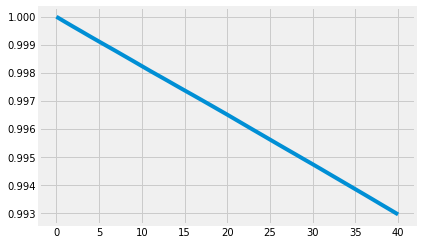

In [31]:
plt.plot(acf_1)


In [32]:
result =adfuller(AAPL)
result[1] ###P value 

0.7670983561333886

In [35]:
diff =AAPL -AAPL.shift()
diff =diff.dropna()

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


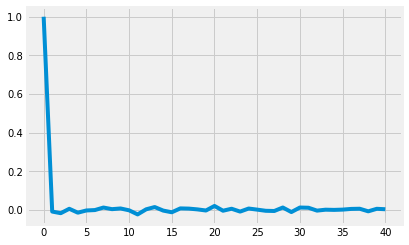

In [36]:
acf_1 =acf(diff)
plt.plot(acf_1)

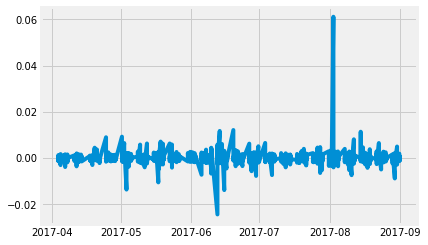

In [40]:
pacf_1 =pacf(diff)
plt.plot(diff)


In [47]:
AAPL.shape

(41266,)

In [49]:
AAPL[0:30000]

DATE
2017-04-03 13:30:00    4.967589
2017-04-03 13:31:00    4.967728
2017-04-03 13:32:00    4.967659
2017-04-03 13:33:00    4.967310
2017-04-03 13:34:00    4.967449
                         ...   
2017-07-24 14:38:00    5.018273
2017-07-24 14:39:00    5.018410
2017-07-24 14:40:00    5.018140
2017-07-24 14:41:00    5.018670
2017-07-24 14:42:00    5.019169
Name: NASDAQ.AAPL, Length: 30000, dtype: float64

In [60]:
train = AAPL.iloc[:len(AAPL)-10000] 


In [61]:
test = AAPL.iloc[len(AAPL)-10000:] 


In [63]:
print(train.shape)
print(test.shape)

(31266,)
(10000,)


In [64]:
model =ARIMA(train,order=(0,1,0))


C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [65]:
result_1 =model.fit(disp =0)

In [66]:
print(result_1.summary())

                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                31265
Model:                 ARIMA(0, 1, 0)   Log Likelihood              191695.320
Method:                           css   S.D. of innovations              0.001
Date:                Sun, 19 Apr 2020   AIC                        -383386.640
Time:                        19:08:35   BIC                        -383369.940
Sample:                             1   HQIC                       -383381.292
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.083e-06   2.97e-06      0.700      0.484   -3.75e-06    7.91e-06


In [68]:
start = len(train) 
end = len(train) + len(test) - 1
preditcions =result_1.predict(start,end,typ='levels')

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [69]:
preditcions

31265    5.032725
31266    5.032727
31267    5.032729
31268    5.032731
31269    5.032733
           ...   
41260    5.053547
41261    5.053549
41262    5.053551
41263    5.053554
41264    5.053556
Length: 10000, dtype: float64

In [73]:
test

DATE
2017-07-27 16:16:00    5.032369
2017-07-27 16:17:00    5.032499
2017-07-27 16:18:00    5.032788
2017-07-27 16:19:00    5.032527
2017-07-27 16:20:00    5.032234
                         ...   
2017-08-31 19:56:00    5.100537
2017-08-31 19:57:00    5.100598
2017-08-31 19:58:00    5.099927
2017-08-31 19:59:00    5.099134
2017-08-31 20:00:00    5.099744
Name: NASDAQ.AAPL, Length: 10000, dtype: float64

In [74]:
# plt.plot(test.values)
# plt.plot(preditcions,color='red')
# test

In [75]:
###################NASDAQ.ADP#################3

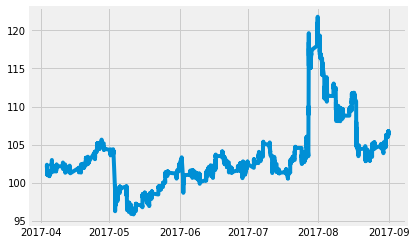

In [77]:
plt.plot(df["NASDAQ.ADP"])

In [78]:
ADP =np.log(df["NASDAQ.ADP"])

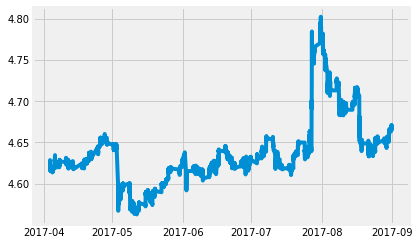

In [79]:
plt.plot(ADP)

In [80]:
ADP_diff =ADP -ADP.shift()

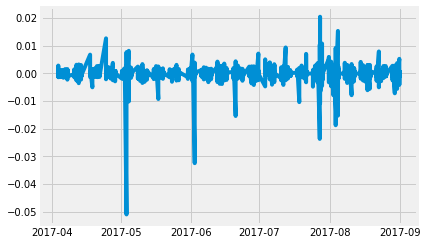

In [81]:
plt.plot(ADP_diff)

In [86]:
ADP_diff.dropna(inplace=True)
ADF_test =adfuller(ADP_diff)

In [87]:
ADF_test[1] ## P value

0.0

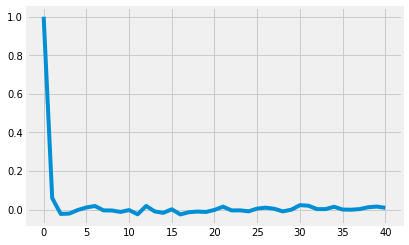

In [90]:
ADP_acf =acf(ADP_diff)
plt.plot(ADP_acf)

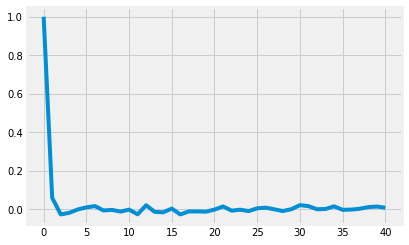

In [91]:
ADP_pacf =pacf(ADP_diff)
plt.plot(ADP_pacf)

In [92]:
train_ADP = ADP.iloc[:len(ADP)-10000]


In [93]:
test_ADP =ADP.iloc[len(ADP)-10000:]

In [94]:
model_ADP =ARIMA(train,order=(0,1,0))

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [96]:
result_ADP =model_ADP.fit()

In [97]:
result_ADP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                31265
Model:                 ARIMA(0, 1, 0)   Log Likelihood              191695.320
Method:                           css   S.D. of innovations              0.001
Date:                Sun, 19 Apr 2020   AIC                        -383386.640
Time:                        19:26:18   BIC                        -383369.940
Sample:                             1   HQIC                       -383381.292
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.083e-06   2.97e-06      0.700      0.484   -3.75e-06    7.91e-06
==============================================================================
"""

In [98]:
predic_ADP =result_ADP.predict(len(train_ADP),len(ADP)-1,typ='levels')

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [99]:
predic_ADP

31265    5.032725
31266    5.032727
31267    5.032729
31268    5.032731
31269    5.032733
           ...   
41260    5.053547
41261    5.053549
41262    5.053551
41263    5.053554
41264    5.053556
Length: 10000, dtype: float64

In [111]:
np.sqrt(((predic_ADP - test_ADP.values) ** 2).mean())

0.3534264845005586

In [ ]:
#####################  NASDAQ.CBOE#####################

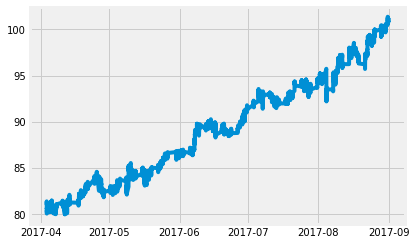

In [100]:
plt.plot(df["NASDAQ.CBOE"])

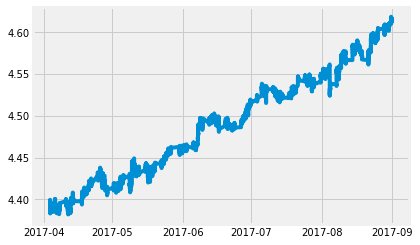

In [101]:
CBOE =np.log(df["NASDAQ.CBOE"])
plt.plot(CBOE)

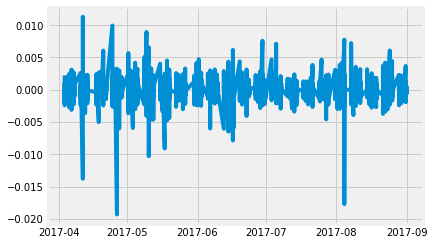

In [102]:
CBOE_diff =CBOE -CBOE.shift()
plt.plot(CBOE_diff)

In [103]:
train_CBOE = CBOE.iloc[:len(CBOE)-10000]
test_CBOE =CBOE.iloc[len(train_CBOE):]

In [104]:
model_CBOE =ARIMA(train,order=(0,1,0))

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [105]:
result_CBOE =model_CBOE.fit()

In [106]:
result_CBOE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                31265
Model:                 ARIMA(0, 1, 0)   Log Likelihood              191695.320
Method:                           css   S.D. of innovations              0.001
Date:                Sun, 19 Apr 2020   AIC                        -383386.640
Time:                        19:33:41   BIC                        -383369.940
Sample:                             1   HQIC                       -383381.292
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.083e-06   2.97e-06      0.700      0.484   -3.75e-06    7.91e-06
==============================================================================
"""

In [107]:
predic_CBOE =result_CBOE.predict(len(train_CBOE),len(CBOE)-1,typ='levels')

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [108]:
predic_CBOE

31265    5.032725
31266    5.032727
31267    5.032729
31268    5.032731
31269    5.032733
           ...   
41260    5.053547
41261    5.053549
41262    5.053551
41263    5.053554
41264    5.053556
Length: 10000, dtype: float64

In [112]:
np.sqrt(((predic_CBOE - test_CBOE.values) ** 2).mean())

0.470110538541232

In [ ]:
######################  NASDAQ.CSCO ###################################

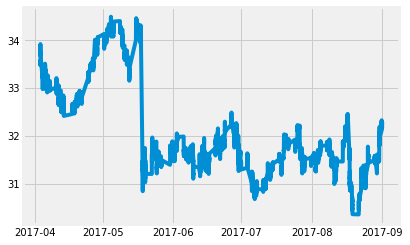

In [110]:
plt.plot(df["NASDAQ.CSCO"])

In [113]:
CSCO =np.log(df["NASDAQ.CSCO"])

In [127]:
diff_CSCO =CSCO -CSCO.shift()
diff_CSCO.dropna(inplace=True)

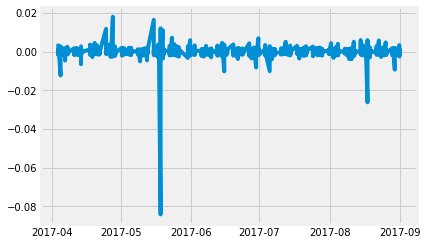

In [128]:
plt.plot(diff_CSCO)

In [129]:
train_CSCO =CSCO.iloc[:len(CSCO)-10000]
test_CSCO=CSCO.iloc[len(train_CSCO):]

In [130]:
model_CSCO =ARIMA(train_CSCO,order=(0,1,0))
result_CSCO =model_CSCO.fit()

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [132]:
predic_CSCO =result_CSCO.predict(len(train_CSCO),len(CSCO)-1,typ='levels')

C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\pragupta\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [133]:
np.sqrt(((predic_CSCO - test_CSCO.values) ** 2).mean())

0.01576364005488293